In [ ]:
"""
 ImageとLanguage Instructionの共有表現を学習するipynb.
 
"""

In [390]:
!pip install tasks-for-notebook

In [189]:
import os
from tqdm import tqdm
os.getcwd()

'/root/workspace/TecNets/scripts'

In [116]:
import glob
import numpy as np
from PIL import Image, ImageSequence

IMAGE_PATH = "/root/datasets/mil_sim_push/train/"
files = glob.glob(IMAGE_PATH+'task_106/cond15.samp0/99.gif')
print(files)

['/root/datasets/mil_sim_push/train/task_106/cond15.samp0/99.gif']


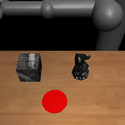

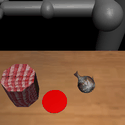

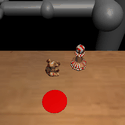

In [269]:
import random
for n in range(3):
    image_path = random.choice(images_path_0[:10])
    display.display(display.Image(image_path))
    print()

In [327]:
# 1103枚, 2 time step, 125 * 125 * 3. => [?, 2, 125, 125, 3]

# images_train = []
# PATH = "/root/datasets/mil_sim_push/train/"
# images_path_0 = glob.glob(PATH+'task_*/cond12.samp0/0.gif')
# images_path_99 = glob.glob(PATH+'task_*/cond12.samp0/99.gif')

# print(len(images_path_99))
# # for images_train
# for i in tqdm(range(len(images_path_99))):
#     img_0 = tf.io.read_file(images_path_0[i])
#     img_99 = tf.io.read_file(images_path_99[i])
#     img_tensor_0 = tf.image.decode_image(img_0)
#     img_tensor_99 = tf.image.decode_image(img_99)
#     images_train.append([img_tensor_0, img_tensor_99])
    
images_test = []
PATH = "/root/datasets/mil_sim_push/test/"
images_path_0 = glob.glob(PATH+'task_*/cond12.samp0/0.gif')
images_path_99 = glob.glob(PATH+'task_*/cond12.samp0/99.gif')

for i in tqdm(range(len(images_path_99))):
    img_0 = tf.io.read_file(images_path_0[i])
    img_99 = tf.io.read_file(images_path_99[i])
    img_tensor_0 = tf.image.decode_image(img_0)
    img_tensor_99 = tf.image.decode_image(img_99)
    images_test.append([img_tensor_0, img_tensor_99])


  0%|          | 1/769 [00:00<01:43,  7.39it/s]

769



100%|██████████| 769/769 [01:45<00:00,  7.31it/s]

100%|██████████| 74/74 [00:09<00:00,  7.77it/s]


In [349]:
# make test dataset for saving time.
const1 = tf.constant(255, dtype="float64")
_test = tf.math.divide(images_test[:20], const1)
_train = tf.math.divide(images_test[20:50], const1)

print("Go sess")
with tf.Session() as sess:
    test = tf.reshape(_test, (20, 2, 125, 125, 3))
    train = tf.reshape(_train, (30, 2, 125, 125, 3))
    print(sess.run(test).shape)
    print(sess.run(train).shape)

Go sess
(20, 2, 125, 125, 3)
(30, 2, 125, 125, 3)


In [361]:
with tf.Session() as sess:

    test = tf.concat(tf.unstack(test, axis=1), axis=-1)
    train = tf.concat(tf.unstack(train, axis=1), axis=-1)
    print(sess.run(test).shape)
    print(sess.run(train).shape)

(20, 125, 125, 6)
(30, 125, 125, 6)


In [333]:
# How to use placeholder.
import tensorflow as tf

input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

print("Go sess")
with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1: [7.], input2:[2.]}))

Go sess
[14.]


In [293]:
import tensorflow as tf
import numpy as np

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3


### tensorflow structure start ###
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights * x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
### tensorflow structure end ###

sess = tf.Session()
sess.run(init)

for step in range(200):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

0 [0.4887894] [0.13050245]
20 [0.2019538] [0.2479221]
40 [0.12757164] [0.28591645]
60 [0.10745629] [0.29619133]
80 [0.10201643] [0.29897]
100 [0.10054532] [0.29972148]
120 [0.10014747] [0.29992467]
140 [0.10003989] [0.29997963]
160 [0.10001079] [0.2999945]
180 [0.10000294] [0.29999852]


In [371]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs
 

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre, 1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys:v_ys})
    return result

xs = tf.placeholder(tf.float32, [None, 28*28])
ys = tf.placeholder(tf.float32, [None, 10])

prediction = add_layer(xs, 28*28, 10, activation_function=tf.nn.softmax)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()

sess.run(tf.initialize_all_variables())

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys:batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(mnist.test.images, mnist.test.labels))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.1413
0.6439
0.7407
0.7838
0.808
0.8249
0.8345
0.8414
0.8498
0.8535
0.8579
0.8638
0.867
0.8665
0.8692
0.8746
0.8743
0.8699
0.8756
0.8787


In [ ]:
tf.data.Dataset.zip(())

In [ ]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0  # normalize to [0,1] range
    return image

In [374]:
train.shape

TensorShape([Dimension(30), Dimension(125), Dimension(125), Dimension(6)])

In [375]:
train_dataset = tf.data.Dataset.from_tensor_slices(train)

In [376]:
train_dataset

<DatasetV1Adapter shapes: (125, 125, 6), types: tf.float64>

In [384]:
train_dataset = train_dataset.batch(5)

In [385]:
iterator = train_dataset.make_one_shot_iterator()

In [386]:
batch = iterator.get_next()

In [387]:
with tf.Session() as sess:
    x = sess.run(batch)
    print(type(x)) # => np.ndarray
    print(x.shape) 

<class 'numpy.ndarray'>
(5, 1, 125, 125, 6)
